<a href="https://colab.research.google.com/github/vkekd25/Sc2_Project/blob/main/Sc2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer ID: 고객 Id      
Customer Unique ID: 고객 고유 Id    
Customer Zip Code prefix: 고객 Zip Code  
Customer City: 고객 사는 도시  
Customer State: 고객 사는 주  
Geolocation Zip Code prefix: 지리 Zip Code  
Geolocation Lat: 위도   
Geolocation Lng: 경도  
Geolocation City: 지리 도시  
Geolocation State: 지리 주  
Order ID: 주문 Id  
Order Item ID: 주문 Item Id  
Seller ID: 판매자 ID  
Shipping limit date: 배송 제한 날짜    
Price:  상품 원가격  
Freight Value: 화물 운송 값    
Order ID: 주문 Id  
Payment Sequential :   
Payment Type.  
Payment Installments.  
Payment Value.  
Product ID.  
Product Category name.  
Product Name length.  
Product Photos (quantity).  
Product Weight (grams).  
Product Length (cm).  
Product Height (cm).  
Product Width (cm).  
Review ID.  
Order ID.  
Review Score.  
Review Comment title.  
Review Comment message.  
Review Creation date.  
Review Answer timestamp**

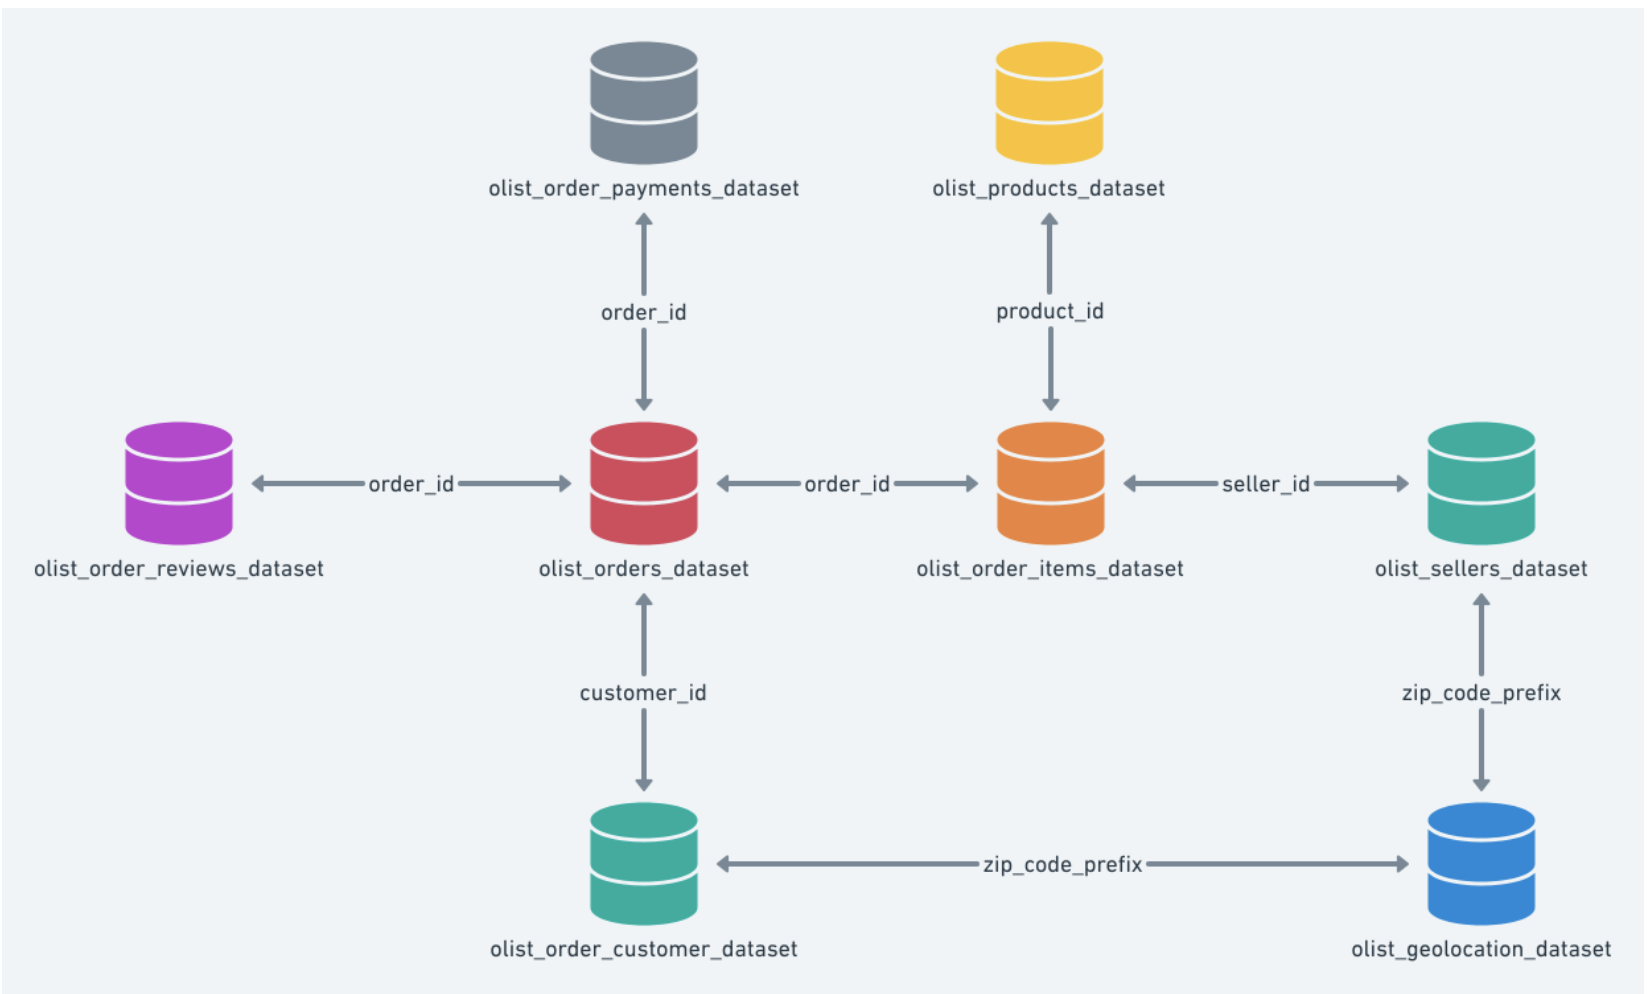

In [1]:
# https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/code 해당 케글 사이트
import os
import pandas as pd

filenames = ['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_order_items_dataset.csv',
             'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_orders_dataset.csv',
             'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']

customers = pd.read_csv(filenames[0])#data.csv불러오기
geolocation = pd.read_csv(filenames[1])
items = pd.read_csv(filenames[2])
payments = pd.read_csv(filenames[3])
reviews = pd.read_csv(filenames[4])
orders = pd.read_csv(filenames[5])
products = pd.read_csv(filenames[6])
sellers = pd.read_csv(filenames[7])
product_category = pd.read_csv(filenames[8])

In [2]:
# order_id merge전 중복행 제거! 
items = items.drop_duplicates('order_id')
payments = payments.drop_duplicates('order_id')
reviews = reviews.drop_duplicates('order_id')
orders = orders.drop_duplicates('order_id')

In [3]:
# merge를 이용하여 데이터 합치기

orders = orders.merge(customers, on = 'customer_id')
orders = orders.merge(reviews, on = 'order_id')
orders = orders.merge(payments, on = 'order_id')
items = items.merge(products, on = 'product_id')
items = items.merge(sellers, on = 'seller_id')

In [4]:
import numpy as np

# 상표이름 스페인어에서 영어로 만드는 함수
category_list = np.array(product_category)
def spa_eng(x):
  for i in category_list:
    x = x.replace(i[0], i[1])
  return x

In [5]:
items['product_category_name'] = spa_eng(items.product_category_name) # Spainish -> English

In [8]:
items.columns, orders.columns

(Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
        'shipping_limit_date', 'price', 'freight_value',
        'product_category_name', 'product_name_lenght',
        'product_description_lenght', 'product_photos_qty', 'product_weight_g',
        'product_length_cm', 'product_height_cm', 'product_width_cm',
        'seller_zip_code_prefix', 'seller_city', 'seller_state'],
       dtype='object'),
 Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date',
        'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
        'customer_state', 'review_id', 'review_score', 'review_comment_title',
        'review_comment_message', 'review_creation_date',
        'review_answer_timestamp', 'payment_sequential', 'payment_type',
        'payment_installments', 'payment_value'],
       dtype='object'))

In [9]:
items111

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.9,16.14,furniture_decor,44.0,533.0,2.0,1000.0,69.0,11.0,11.0,80220,curitiba,PR
98662,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.0,16.21,electronics,32.0,1306.0,3.0,500.0,17.0,9.0,25.0,82620,curitiba,PR
98663,fecc4ea5a3e06ce3192ae2f05b7a8439,1,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.9,14.10,furniture_decor,31.0,437.0,2.0,100.0,65.0,11.0,11.0,31565,belo horizonte,MG
98664,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,computers,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,86026,londrina,PR


In [ ]:
customers.duplicated('customer_zip_code_prefix').sum(), sellers.duplicated('seller_zip_code_prefix').sum()